In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/online_retail_reduced.zip"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/online_retail_data_reduced")  # Extract to a folder

    print("Files extracted successfully!")


Files extracted successfully!


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import os

# Define the extracted file path
extracted_file_path = "/content/online_retail_data_reduced/online_retail_reduced.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(extracted_file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Description  9975 non-null   object 
 3   Quantity     10000 non-null  int64  
 4   InvoiceDate  10000 non-null  object 
 5   UnitPrice    10000 non-null  float64
 6   CustomerID   6414 non-null   float64
 7   Country      10000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB
None

First 5 Rows:
  InvoiceNo StockCode                         Description  Quantity  \
0    539262     21429      RED GINGHAM ROSE JEWELLERY BOX         8   
1    537201     22578  WOODEN STAR CHRISTMAS SCANDINAVIAN        12   
2    536389     21791  VINTAGE HEADS AND TAILS CARD GAME         12   
3    537378     21754            HOME BUILDING BLOCK WORD         8   
4    539647     2209

In [ ]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing CustomerID (if needed)
df = df.dropna(subset=['CustomerID'])

# Fill missing values in the 'Description' column (optional)
df['Description'] = df['Description'].fillna("Unknown")

# Verify missing values are handled
print("\nMissing Values after cleaning:\n", df.isnull().sum())


Missing Values:
 InvoiceNo         0
StockCode         0
Description      25
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     3586
Country           0
dtype: int64

Missing Values after cleaning:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Convert InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verify conversion
print("\nData type after conversion:", df.dtypes['InvoiceDate'])



Data type after conversion: datetime64[ns]


In [ ]:
# Remove duplicate records
df = df.drop_duplicates()

print("\nDuplicates removed! New shape:", df.shape)



Duplicates removed! New shape: (6392, 8)


In [ ]:
# Remove transactions with zero or negative Quantity
df = df[df['Quantity'] > 0]

# Remove transactions with zero or negative UnitPrice
df = df[df['UnitPrice'] > 0]

print("\nAnomalies removed! New shape:", df.shape)



Anomalies removed! New shape: (6206, 8)


In [ ]:
# Reset index after data cleaning
df = df.reset_index(drop=True)

print("\nData cleaning completed! Final dataset shape:", df.shape)



Data cleaning completed! Final dataset shape: (6206, 8)


In [ ]:
# Check the final dataset overview
df.info()

# Show first few cleaned rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    6206 non-null   object        
 1   StockCode    6206 non-null   object        
 2   Description  6206 non-null   object        
 3   Quantity     6206 non-null   int64         
 4   InvoiceDate  6206 non-null   datetime64[ns]
 5   UnitPrice    6206 non-null   float64       
 6   CustomerID   6206 non-null   float64       
 7   Country      6206 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 388.0+ KB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539262,21429,RED GINGHAM ROSE JEWELLERY BOX,8,2010-12-16 14:35:00,1.65,15789.0,United Kingdom
1,537201,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,12,2010-12-05 14:19:00,0.85,12472.0,Germany
2,536389,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2010-12-01 10:03:00,1.25,12431.0,Australia
3,537378,21754,HOME BUILDING BLOCK WORD,8,2010-12-06 13:06:00,5.95,14911.0,EIRE
4,539647,22098,BOUDOIR SQUARE TISSUE BOX,1,2010-12-20 16:08:00,1.25,15460.0,United Kingdom


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


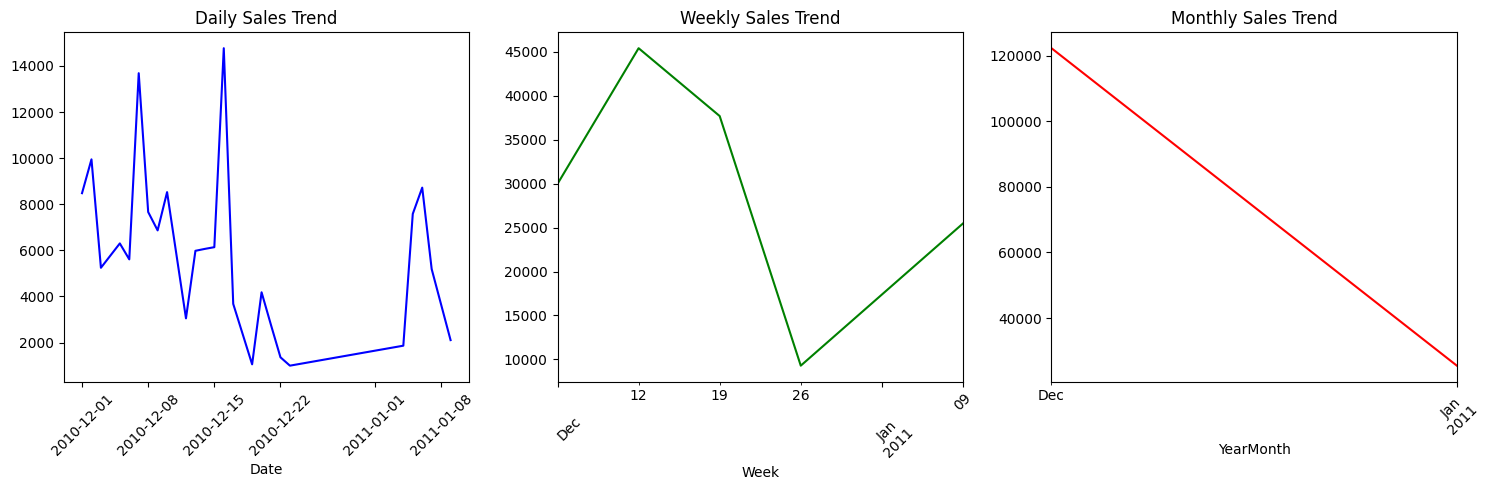

In [ ]:
# Calculate TotalRevenue column if it doesn't exist
if 'TotalRevenue' not in df.columns:
    df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

    # Extract date-based features
    df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')  # Monthly
    df['Week'] = df['InvoiceDate'].dt.to_period('W')  # Weekly
    df['Date'] = df['InvoiceDate'].dt.date  # Daily

    # Aggregate sales per time period
    daily_sales = df.groupby('Date')['TotalRevenue'].sum()
    weekly_sales = df.groupby('Week')['TotalRevenue'].sum()
    monthly_sales = df.groupby('YearMonth')['TotalRevenue'].sum()

    # Plot trends
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    daily_sales.plot(title="Daily Sales Trend", color='blue')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 2)
    weekly_sales.plot(title="Weekly Sales Trend", color='green')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 3)
    monthly_sales.plot(title="Monthly Sales Trend", color='red')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

<ipython-input-15-a7853a5f8bd7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


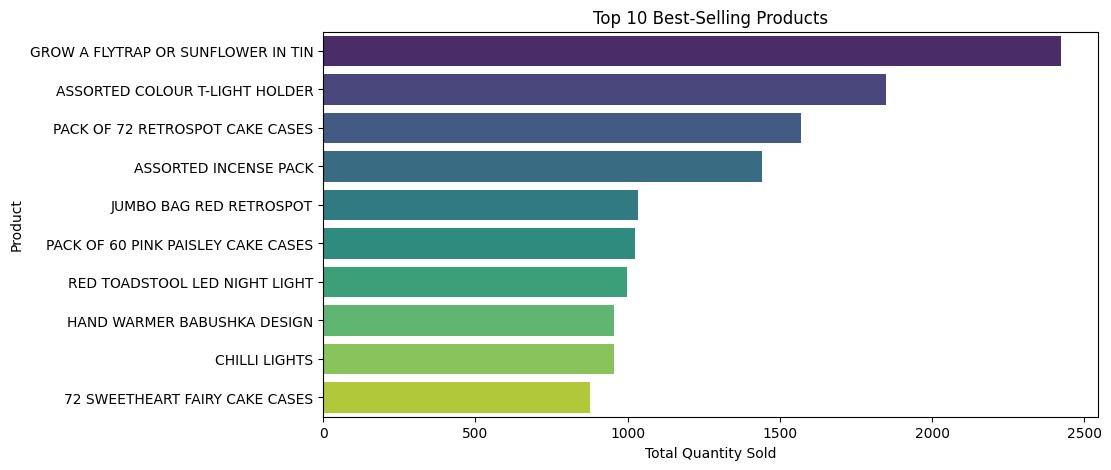

In [ ]:
# Identify top-selling products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.title("Top 10 Best-Selling Products")
plt.show()


<ipython-input-16-26cec7015624>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette="coolwarm")


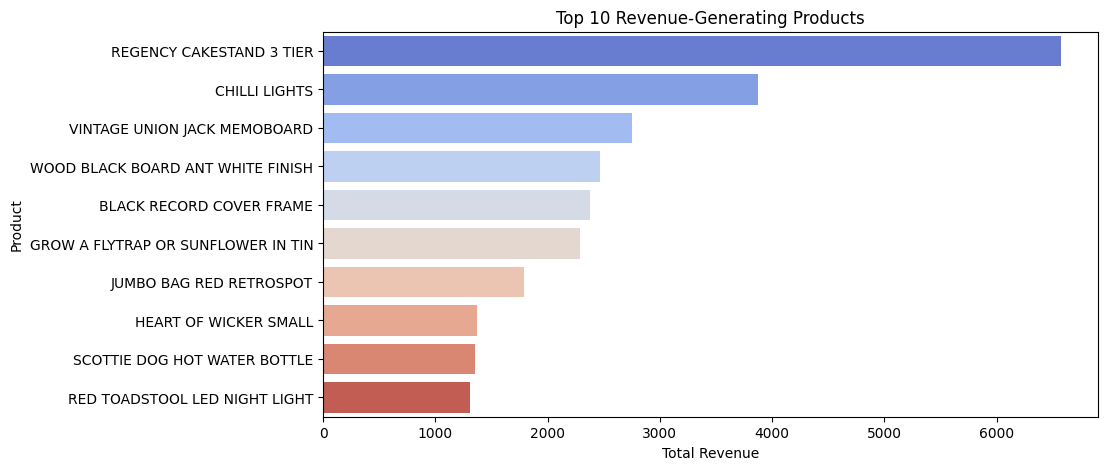

In [ ]:
# Identify products generating the highest revenue
top_revenue_products = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 revenue-generating products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette="coolwarm")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.title("Top 10 Revenue-Generating Products")
plt.show()


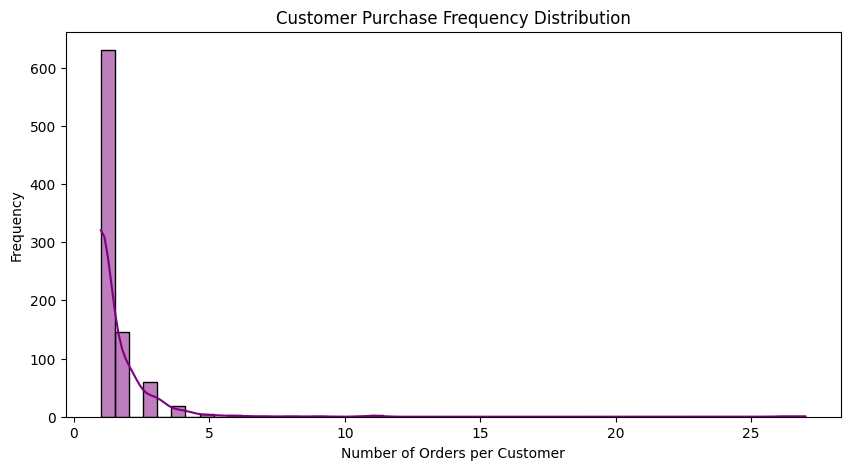

In [ ]:
# Count purchases per customer
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Plot distribution of order frequency
plt.figure(figsize=(10, 5))
sns.histplot(customer_orders, bins=50, kde=True, color="purple")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Frequency")
plt.title("Customer Purchase Frequency Distribution")
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79gdogil/9_vbch9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79gdogil/0ix6d00s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57601', 'data', 'file=/tmp/tmp79gdogil/9_vbch9f.json', 'init=/tmp/tmp79gdogil/0ix6d00s.json', 'output', 'file=/tmp/tmp79gdogil/prophet_model90cpdlwv/prophet_model-20250313075025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:50:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:

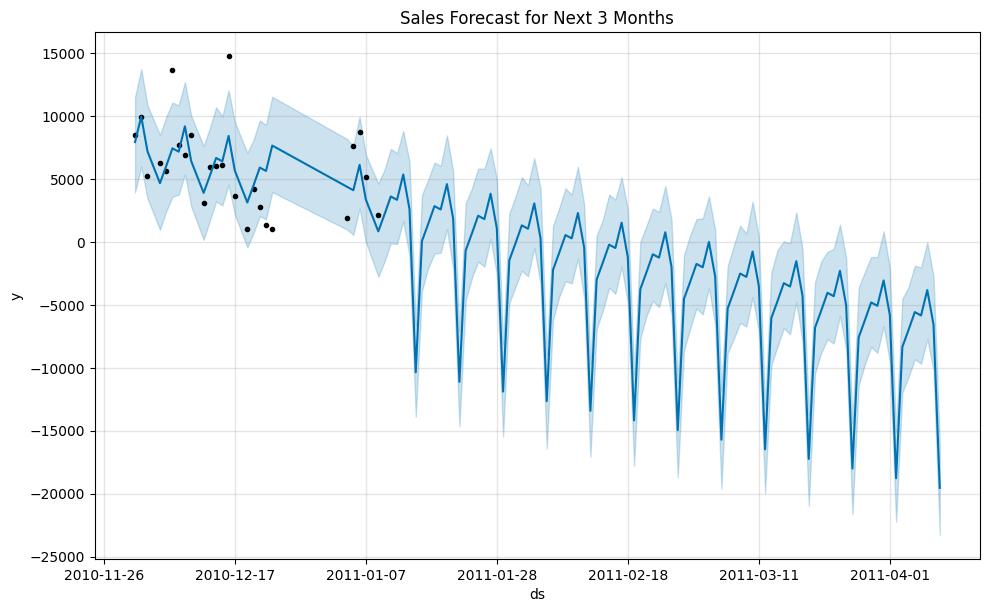

In [ ]:
!pip install prophet
from prophet import Prophet

# Prepare data for Prophet
sales_data = daily_sales.reset_index()
sales_data.columns = ['ds', 'y']  # Prophet requires 'ds' (date) and 'y' (value)

# Initialize & fit the model
model = Prophet()
model.fit(sales_data)

# Create future dataframe (next 90 days)
future = model.make_future_dataframe(periods=90)

# Predict future sales
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Sales Forecast for Next 3 Months")
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = "/content/online_retail_data_reduced/online_retail_reduced.csv"  # Update path if needed
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Select numerical columns
numerical_cols = ["Quantity", "UnitPrice"]

# Compute skewness and kurtosis
skewness = df[numerical_cols].apply(skew)
kurt = df[numerical_cols].apply(kurtosis)

# Print results
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurt)


Skewness:
 Quantity     30.101410
UnitPrice    57.356185
dtype: float64
Kurtosis:
 Quantity     1332.902373
UnitPrice    3494.014055
dtype: float64


In [ ]:
from scipy.stats import zscore

# Compute Z-score for Quantity
df['Z_Score'] = zscore(df['Quantity'])

# Filter extreme outliers (Z-Score > 3)
outliers = df[df['Z_Score'].abs() > 3]
outliers.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score
33,536736,22555,PLASTERS IN TIN STRONGMAN,144,2010-12-02 12:59:00,1.65,17381.0,United Kingdom,3.068931
150,539731,22856,ASSORTED EASTER DECORATIONS BELLS,288,2010-12-21 15:05:00,1.06,14646.0,Netherlands,6.348606
217,538991,22259,FELT FARM ANIMAL HEN,144,2010-12-15 11:53:00,0.42,17511.0,United Kingdom,3.068931
642,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,41.331805
718,538526,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,144,2010-12-13 09:49:00,1.69,13225.0,United Kingdom,3.068931


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/online_retail_data_reduced/online_retail_reduced.csv"  # Update path if needed
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Remove outliers using the IQR method
def remove_outliers(df, columns):
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df = remove_outliers(df, numerical_cols)


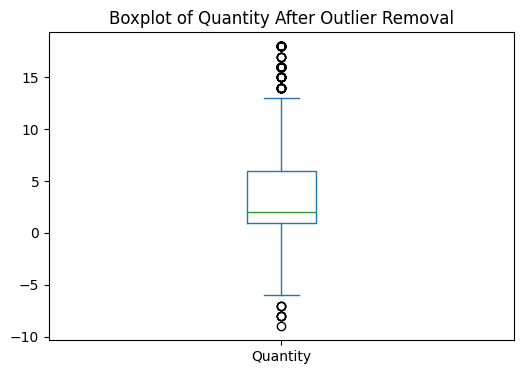

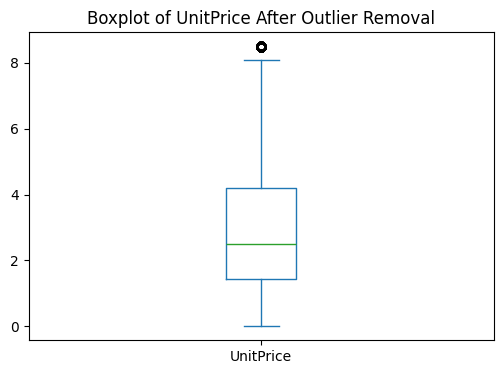

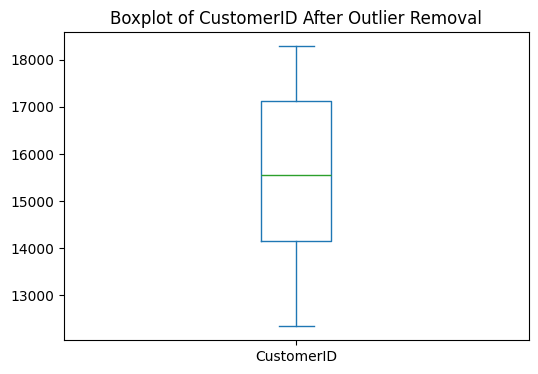

In [ ]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].plot(kind='box')
    plt.title(f"Boxplot of {col} After Outlier Removal")
    plt.show()


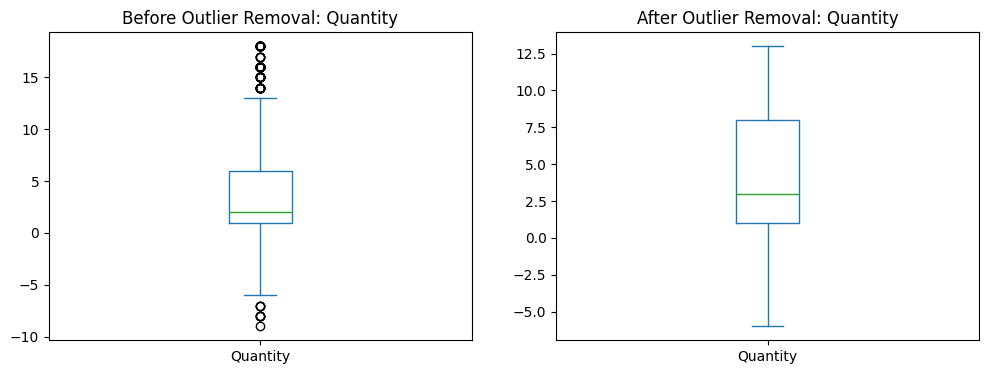

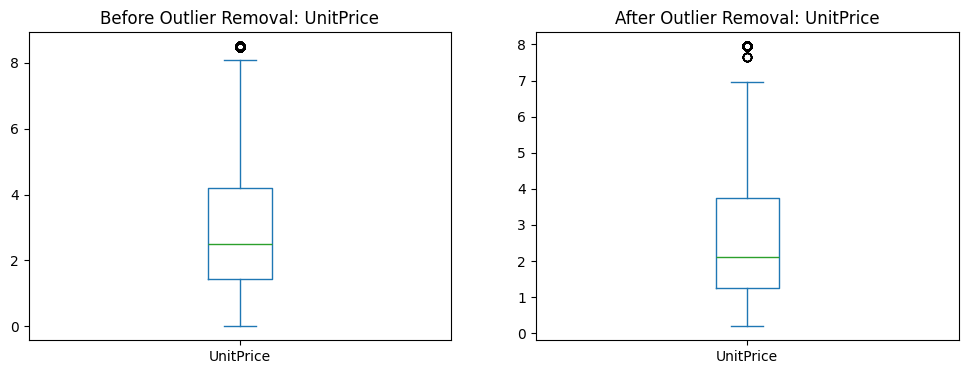

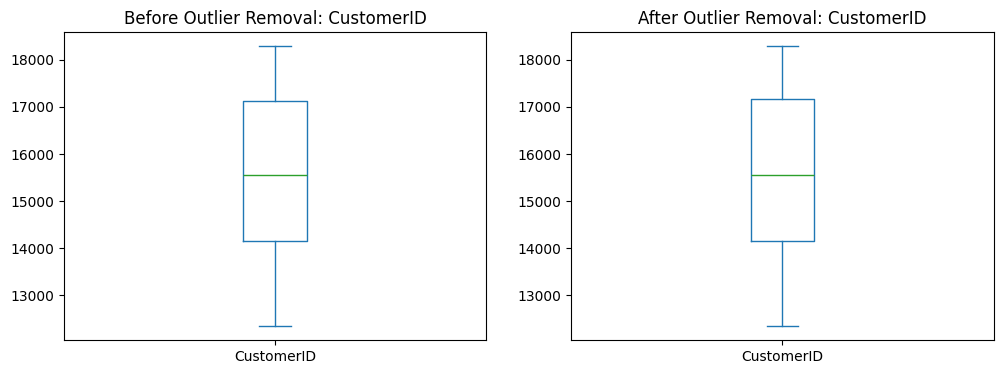

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to remove outliers using IQR
def remove_outliers_iqr(df, numerical_cols):
    cleaned_df = df.copy()
    for col in numerical_cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Plot boxplots before and after outlier removal
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Original Data
    df[col].plot(kind='box', ax=axes[0])
    axes[0].set_title(f"Before Outlier Removal: {col}")

    # Cleaned Data
    df_cleaned[col].plot(kind='box', ax=axes[1])
    axes[1].set_title(f"After Outlier Removal: {col}")

    plt.show()


Original shape: (8220, 8)
Cleaned shape: (4759, 8)


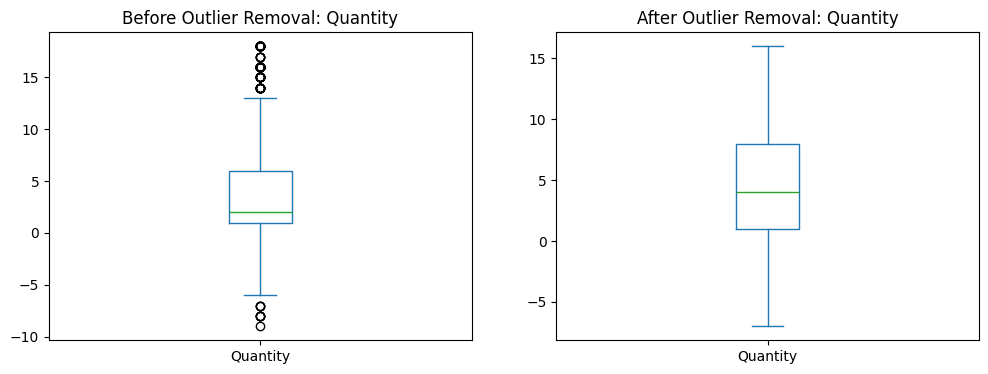

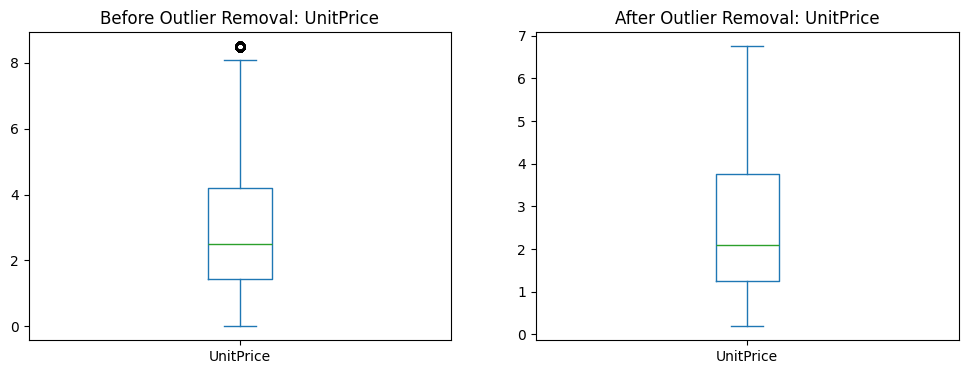

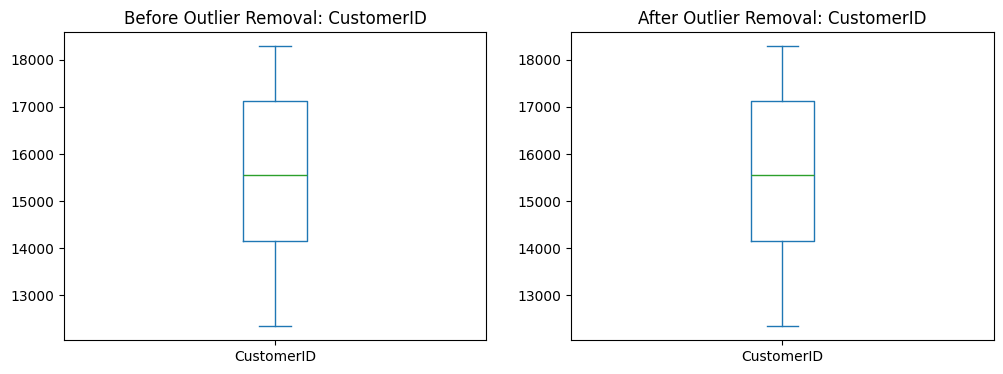

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers_iqr(df, numerical_cols, iqr_multiplier=1.2):
    df = df.dropna(subset=numerical_cols)  # Drop NaN values
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df.reset_index(drop=True)  # Reset index

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Check if rows were removed
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

# Plot boxplots before and after outlier removal
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    df[col].plot(kind='box', ax=axes[0])
    axes[0].set_title(f"Before Outlier Removal: {col}")

    df_cleaned[col].plot(kind='box', ax=axes[1])
    axes[1].set_title(f"After Outlier Removal: {col}")

    plt.show()


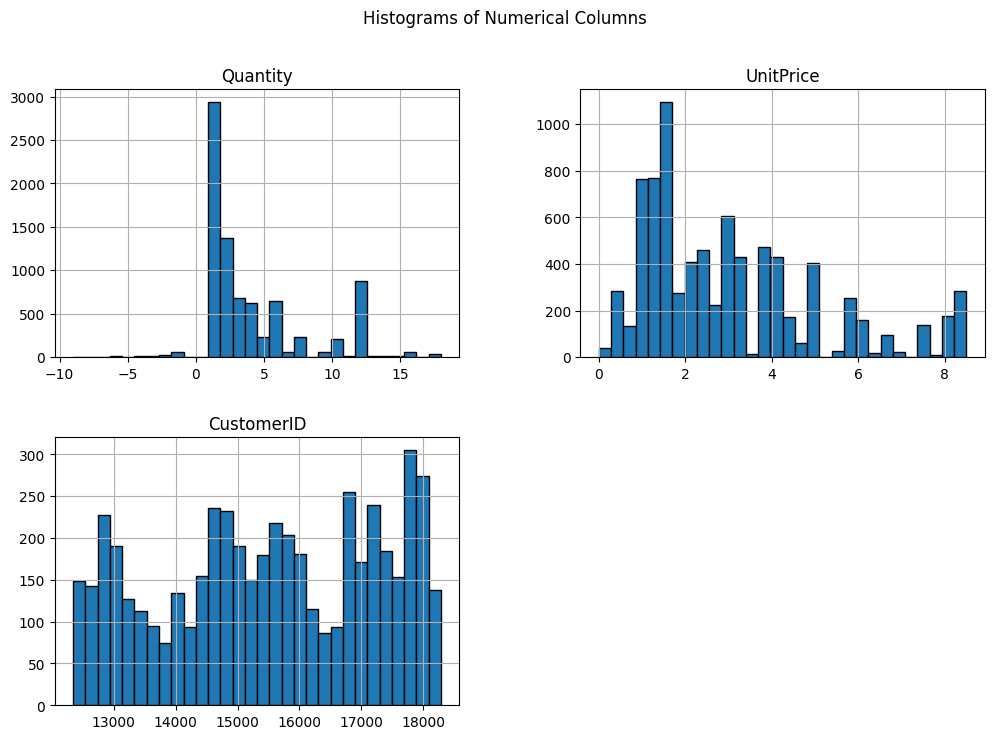

In [ ]:
# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()


In [ ]:
# Convert 'CustomerID' and 'InvoiceNo' to numeric, handling errors
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

# Drop rows with missing values in 'CustomerID' and 'InvoiceNo'
df = df.dropna(subset=['CustomerID', 'InvoiceNo'])

# Select numerical features for outlier removal
numerical_cols = ['Quantity', 'UnitPrice']

# Outlier removal using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")



Original data shape: (4984, 8)
Cleaned data shape: (4699, 8)


In [ ]:
!pip install imbalanced-learn  # Install the imblearn library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df[numerical_cols].drop(columns=['CustomerID'], errors='ignore')  # Drop ID-like columns
y = (df['Quantity'] > df['Quantity'].median()).astype(int)  # Binary target variable

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Apply Logistic Regression model with L2 regularization
log_reg = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9829488465396189


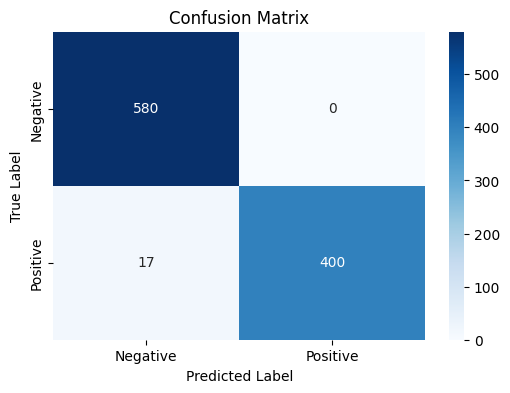

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score


# Precision, Recall, F1-Score, and AUC Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 1.0000
Recall: 0.9592
F1 Score: 0.9792
ROC AUC Score: 0.9796

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       580
           1       1.00      0.96      0.98       417

    accuracy                           0.98       997
   macro avg       0.99      0.98      0.98       997
weighted avg       0.98      0.98      0.98       997



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Feature selection: Drop 'CustomerID' and 'Quantity' (to prevent target leakage)
X = df.select_dtypes(include=['number']).drop(columns=['CustomerID', 'Quantity'], errors='ignore')
y = (df['Quantity'] > df['Quantity'].median()).astype(int)  # Binary classification target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training, validation, and test sets (stratified)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to balance classes in training data
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define the model
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [10, 12],
    "min_samples_split": [10, 15]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on validation set
y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Final test evaluation
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nFinal Test Accuracy of Random Forest:", test_accuracy)
print("\nBest Hyperparameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Validation Accuracy: 0.6991978609625669

Final Test Accuracy of Random Forest: 0.713903743315508

Best Hyperparameters: {'max_depth': 12, 'min_samples_split': 10, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       435
           1       0.65      0.69      0.67       313

    accuracy                           0.71       748
   macro avg       0.71      0.71      0.71       748
weighted avg       0.72      0.71      0.71       748



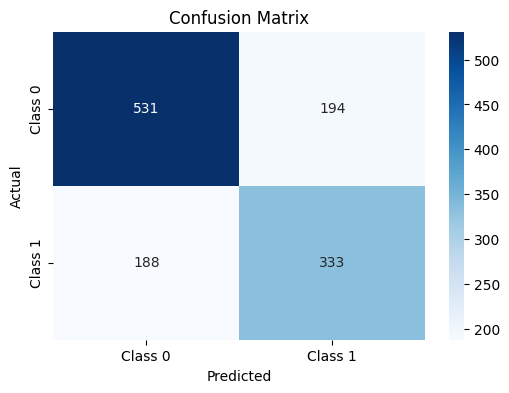

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Feature selection: Drop 'CustomerID' and 'Quantity' (to prevent target leakage)
X = df.select_dtypes(include=['number']).drop(columns=['CustomerID', 'Quantity'], errors='ignore')
y = (df['Quantity'] > df['Quantity'].median()).astype(int)  # Binary classification target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets (stratified)
# Adjust test_size to match the expected size of y_test_pred
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Apply SMOTE to balance classes in training data
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define the model
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)


# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Define features and target variable
X = df[numerical_cols].drop(columns=['CustomerID'], errors='ignore')  # Drop ID-like columns
y = (df['Quantity'] > df['Quantity'].median()).astype(int)  # Binary target variable

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Apply GridSearchCV to tune n_neighbors and distance metric
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best KNN model
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predictions and accuracy
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Optimized KNN Accuracy:", accuracy)
print("\nBest Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Optimized KNN Accuracy: 0.9979939819458375

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       580
           1       1.00      1.00      1.00       417

    accuracy                           1.00       997
   macro avg       1.00      1.00      1.00       997
weighted avg       1.00      1.00      1.00       997



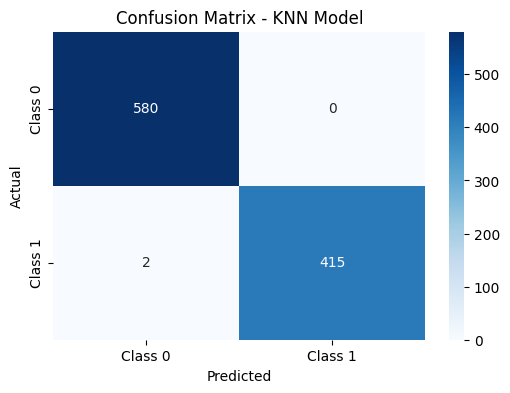

In [ ]:
!pip install imbalanced-learn  # Install the imblearn library
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'numerical_cols' are defined

# Define features and target variable
X = df[numerical_cols].drop(columns=['CustomerID'], errors='ignore')  # Drop ID-like columns
y = (df['Quantity'] > df['Quantity'].median()).astype(int)  # Binary target variable

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets with the same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Apply GridSearchCV to tune n_neighbors and distance metric
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best KNN model
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predictions and accuracy
y_pred = best_knn.predict(X_test)  # Use X_test from the same split
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Model")
plt.show()

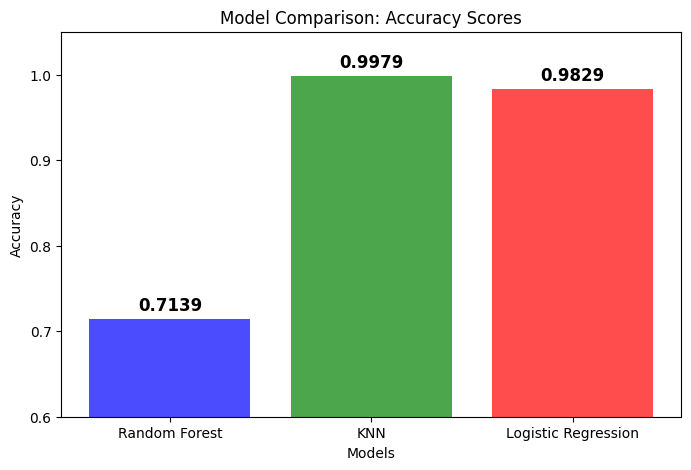

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and corresponding accuracy scores
models = ["Random Forest", "KNN", "Logistic Regression"]
accuracies = [0.7139, 0.9979, 0.9829]  # Rounded to 4 decimal places for clarity

# Define bar positions
x_pos = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(x_pos, accuracies, color=['blue', 'green', 'red'], alpha=0.7)

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy Scores")
plt.xticks(x_pos, models)
plt.ylim(0.6, 1.05)  # Adjust y-axis for better visualization

# Display accuracy values on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


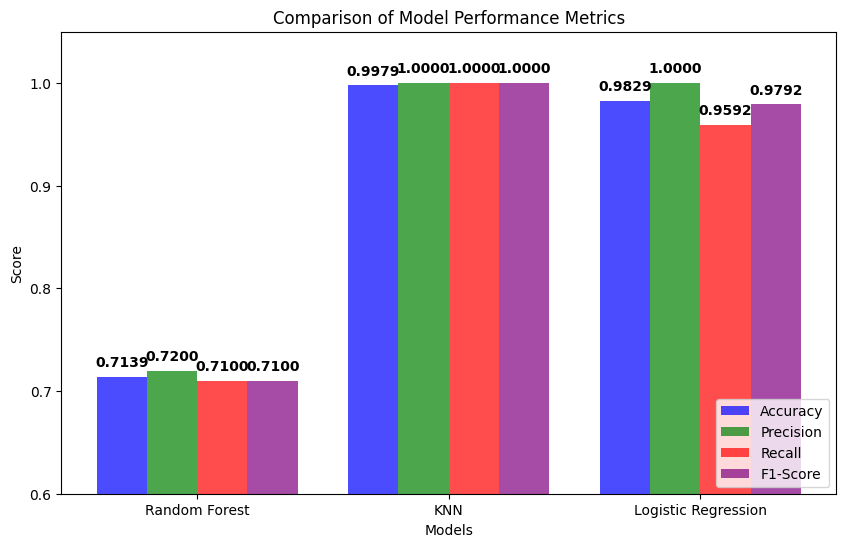

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ["Random Forest", "KNN", "Logistic Regression"]

# Define metric values for each model
accuracy = [0.7139, 0.9979, 0.9829]  # Accuracy values
precision = [0.72, 1.00, 1.00]       # Precision values
recall = [0.71, 1.00, 0.9592]        # Recall values
f1_score = [0.71, 1.00, 0.9792]      # F1-score values

# Define bar positions
x = np.arange(len(models))
width = 0.2  # Width of bars

# Create the bar chart
plt.figure(figsize=(10, 6))

# Plot bars for each metric
plt.bar(x - width*1.5, accuracy, width, label="Accuracy", color="blue", alpha=0.7)
plt.bar(x - width/2, precision, width, label="Precision", color="green", alpha=0.7)
plt.bar(x + width/2, recall, width, label="Recall", color="red", alpha=0.7)
plt.bar(x + width*1.5, f1_score, width, label="F1-Score", color="purple", alpha=0.7)

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Model Performance Metrics")
plt.xticks(x, models)
plt.ylim(0.6, 1.05)  # Adjust y-axis for better visualization
plt.legend(loc="lower right")

# Display values on bars
for i, v in enumerate(accuracy):
    plt.text(i - width*1.5, v + 0.01, f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

for i, v in enumerate(precision):
    plt.text(i - width/2, v + 0.01, f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

for i, v in enumerate(recall):
    plt.text(i + width/2, v + 0.01, f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

for i, v in enumerate(f1_score):
    plt.text(i + width*1.5, v + 0.01, f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

# Show the plot
plt.show()
